# Music and Physics

In [1]:
import time
from collections import OrderedDict

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from synthesizer import Player, Synthesizer, Waveform

- In a 12-tone equal-tempered tuning system, probably the most common such system in Western culture, Musical notes are ordered by their frequency (usually measured in Hertz, which is a measurement relating the cycles of a wave -- sounds are waves -- to a unit of time, in this case seconds, e.g. 1 Hz means that the wave completes one cycle in one second) in a proportional relationship.
- The ratios of the frequencies of any pair of adjacent notes is the same.
- The 12-tone equal-tempered scale calculates notes proportional to a logarithmic scale, 2<sup>*n*/12</sup>, where *n* is the humber of half-steps away from a base note, which will be explained next.
- First a base note is picked, which could be any human-hearable note (humans hear in the range 20 Hz to 20,000 Hz), let's call it *f<sub>0</sub>*.
- To get the note one half-step above that note (the next note in order), it would be *f<sub>0</sub>*\*2<sup>1/12</sup>, and the next would be *f<sub>0</sub>*\*2<sup>2/12</sup>, etc. To get a note one half-step down, it would be *f<sub>0</sub>*\*2<sup>-1/12</sup>.
- For example, let's say that our base note has a frequency of 440.0 Hz. That would mean that, according to the logarithmic scale, the note one half-step above would be 440.0\*2<sup>1/12</sup>, or 466.16 Hz. One half-step down from 440.0 would be 440.0\*2<sup>-1/12</sup>, or 415.30 Hz.
- Thus, this is the formula that can be used to calculate the frequencies of notes of the [12-tone "equal-tempered" scale](https://pages.mtu.edu/~suits/scales.html):
    $$f_n = f_0*a^n$$
where:
    - *f<sub>0</sub>* = the frequency of one fixed note which must be defined. A common choice is setting the A above middle C (A<sub>4</sub>) at *f<sub>0</sub>* = 440 Hz.
    - *n* = the number of half steps away from the fixed note you are. If you are at a higher note, *n* is positive. If you are on a lower note, *n* is negative.
    - *f<sub>n</sub>* = the frequency of the note *n* half steps away.
    - *a* = 2<sup>1/12</sup>, i.e. the twelth root of 2, the number which when multiplied by itself 12 times equals 2 (1.059463094359)
- Let's define *f<sub>n</sub>* now with our base note set to 440 Hz, which is commonly referred to as A4 and used commonly as the base note (though the exact frequency assigned to this base note can sometimes be slighly more or less than 440 HZ).
- 12 half-step notes above our base note, the frequency doubles. That is, if our base note is 440 Hz (A4), then one octave above (A5) would have a frequency of 880 Hz.

In [2]:
# Setting f_0 to 440.0, the base note, which is the A above middle C (A4)
f_0 = 440.0

# Setting the constant a
a = 2**(1/12)

def f(n):
    return f_0*a**n

## Octave
- An octave is defined in the following order, each note a half-step higher than the last:
    - C
    - C#/Db
    - D
    - D#/Eb
    - E
    - F
    - F#/Gb
    - G
    - G#/Ab
    - A
    - A#/Bb
    - B
- Notes:
    - The "#" suffix refers to "sharp" notes
    - The "b" suffix refers to "flat" notes
    - Sharp notes are equivalent to flat notes for the note one half-step above, for example C# = Db
    - There are 12 notes in this octave, which, if you'll recall, is part of the logarithmic formula we are using, e.g. *a* = 2<sup>1/12</sup>. It could be the case that we could have a different number of notes per "octave", such as 10 instead of 12. But the fact is that, historically, we have used a scale based on 12-note octaves.

- Let's define an octave as an ordered list of the half-step notes.

In [3]:
octave = ["c",
          "c#_db",
          "d",
          "d#_eb",
          "e",
          "f",
          "f#_gb",
          "g",
          "g#_ab",
          "a",
          "a#_bb",
          "b"]

- Since our base note is A4 (the 58th half-step from C0, i.e. there are 4 octaves + 10 half-steps till you get to A4), let's define all the notes and their frequencies from C0 all the way to B8.

In [5]:
# We will first create an empty ordered dictionary that will
# hold all of the semitones in the 12-tone chromatic scale,
# from octave 0 to octave 8 (9 octaves).
full_scale = OrderedDict()

# Now we iterate through 0 to 8, incrementing `n_halfstep`
# as each semitone is added.
n_halfstep = 0
for i in range(9):

    # For each iteration, we will set the name of the note
    # in our dictionary as the name of the note + the number
    # of the iteration, e.g. "c_0", then "c#_db_0", and so
    # on. The value of the note will be calculated using
    # our function `f` (defined above) in terms of the
    # number of half-steps we are away from A4 (simply
    # subtract 57), whether negative or positive.
    for note in octave:
        full_scale["{}_{}".format(note, i)] = f(n_halfstep - 57)
        n_halfstep += 1

# Convert our ordered dictionary into a table for easy
# viewing, etc.
full_scale = pd.DataFrame(list(full_scale.items()), columns=["note", "frequency"])

# Let's also put in a column that has the number of
# the corresponding octave (redundant since it's the
# last part of the name of each note, but useful to
# keep separate in addition).
full_scale["octave"] = full_scale.note.apply(lambda x: int(x.split("_")[-1]))

- Now that we have our scale table, we can look at the first octave (0):

In [6]:
full_scale[full_scale.octave == 0]

,note,frequency,octave
0,c_0,16.351598,0
1,c#_db_0,17.323914,0
2,d_0,18.354048,0
3,d#_eb_0,19.445436,0
4,e_0,20.601722,0
5,f_0,21.826764,0
6,f#_gb_0,23.124651,0
7,g_0,24.499715,0
8,g#_ab_0,25.956544,0
9,a_0,27.500000,0


- Let's look at the 4th octave, which should include our middle A (A4) set to 440 Hz:

In [7]:
full_scale[full_scale.octave == 4]

,note,frequency,octave
48,c_4,261.625565,4
49,c#_db_4,277.182631,4
50,d_4,293.664768,4
51,d#_eb_4,311.126984,4
52,e_4,329.627557,4
53,f_4,349.228231,4
54,f#_gb_4,369.994423,4
55,g_4,391.995436,4
56,g#_ab_4,415.304698,4
57,a_4,440.000000,4


- As mentioned earlier, every 12 half-steps should result in a doubling (or halving, depending on the direction) of the frequencies.
- Let's get every A note from all 9 octaves, which shows this doubling.

In [8]:
full_scale.loc[[i*12 + 9 for i in range(9)]]

,note,frequency,octave
9,a_0,27.5,0
21,a_1,55.0,1
33,a_2,110.0,2
45,a_3,220.0,3
57,a_4,440.0,4
69,a_5,880.0,5
81,a_6,1760.0,6
93,a_7,3520.0,7
105,a_8,7040.0,8


- Awesome! So, now we have all of the notes and their frequencies in Hz.
- Let's think about how the frequencies look in terms of plotting.
- Sound exists as a "wave", where the frequency (Hz) of the sound describes how many cycles (starting at one position and ending at the same position would be one such cycle) occur per second.
- Thus, A4, with a frequency of 440.0Hz, means that in one second, there will be 440 cycles of the wave.
- Let's plot the waveforms of A4, A\#4/Bb4, and B4, three adjacent in a row, separated by a half-step. And let's add in the addition of the waves to see what kind of pattern emerges.

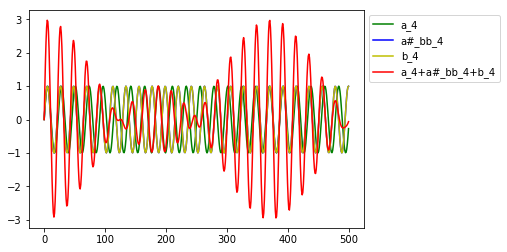

In [9]:
Fs = 10000
a4 = full_scale[full_scale.note == "a_4"].iloc[0]
asharp4 = full_scale[full_scale.note == "a#_bb_4"].iloc[0]
b4 = full_scale[full_scale.note == "b_4"].iloc[0]
sample = 500
x = np.arange(sample)

y1 = np.sin(2 * np.pi * a4.frequency * x / Fs)
y2 = np.sin(2 * np.pi * asharp4.frequency * x / Fs)
y3 = np.sin(2 * np.pi * b4.frequency * x / Fs)
y4 = y1 + y2 + y3
fig, ax = plt.subplots()
ax.plot(x, y1, label=a4.note, color='g')
ax.plot(x, y2, label=asharp4.note, color='b')
ax.plot(x, y2, label=b4.note, color='y')
ax.plot(x, y4, label="+".join([a4.note, asharp4.note, b4.note]), color='r')
ax.legend(bbox_to_anchor=(1.0, 1.0))

- These three notes are similar, but they are out of sync with respect to their cycles: they diverge and then overlap, and then diverge again, and so on.
- Let's fist play A4 by itself. Then we will play A4 and A\#4/Bb4. The second sound should be rather disonant.

In [10]:
player = Player()
player.open_stream()
synthesizer = Synthesizer(osc1_waveform=Waveform.sine, osc1_volume=1.0, use_osc2=False)

In [11]:
print("Here's A4 by itself...")
player.play_wave(synthesizer.generate_constant_wave(a4.frequency, 3.0))

time.sleep(2)
print("And now here's A#4/Bb4 played simultaneously...")
player.play_wave(synthesizer.generate_chord([a4.frequency, asharp4.frequency, b4.frequency], 3.0))

Here's A4 by itself...
And now here's A#4/Bb4 played simultaneously...


- Now let's plot the sine waves corresponding to a chord known to be harmonious, C Major.
- Afterwards, we can play the chord to see how it sounds.

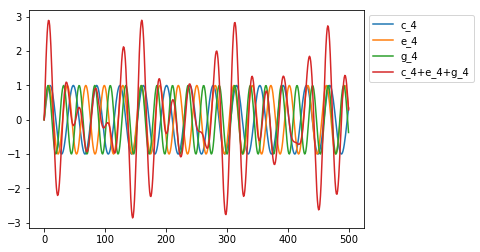

In [12]:
cmaj_chord = [full_scale[full_scale.note == "c_4"].iloc[0],
              full_scale[full_scale.note == "e_4"].iloc[0],
              full_scale[full_scale.note == "g_4"].iloc[0]]
Fs = 10000
c4, e4, g4 = cmaj_chord
sample = 500
x = np.arange(sample)

y1 = np.sin(2 * np.pi * c4.frequency * x / Fs)
y2 = np.sin(2 * np.pi * e4.frequency * x / Fs)
y3 = np.sin(2 * np.pi * g4.frequency * x / Fs)
y4 = y1 + y2 + y3
fig, ax = plt.subplots()
ax.plot(x, y1, label=c4.note)
ax.plot(x, y2, label=e4.note)
ax.plot(x, y3, label=g4.note)
ax.plot(x, y4, label="+".join([c4.note, e4.note, g4.note]))
ax.legend(bbox_to_anchor=(1.0, 1.0))

- When these waveforms are plotted together, one can see that there is a regular pattern, that is, that the notes are aligned in terms of their cycles.
- Playing them simultaneously should result in a pleasing sound.

In [13]:
player.play_wave(synthesizer.generate_chord([x.frequency for x in cmaj_chord], 3.0))

- Let's modify the chord such that one note, E4, is instead Eb4 (or D\#4).

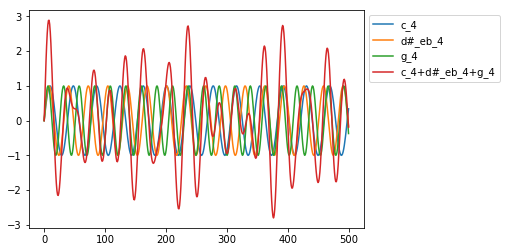

In [14]:
bad_chord = [full_scale[full_scale.note == "c_4"].iloc[0],
             full_scale[full_scale.note == "d#_eb_4"].iloc[0],
             full_scale[full_scale.note == "g_4"].iloc[0]]
Fs = 10000
c4, dsharp4, g4 = bad_chord
sample = 500
x = np.arange(sample)

y1 = np.sin(2 * np.pi * c4.frequency * x / Fs)
y2 = np.sin(2 * np.pi * dsharp4.frequency * x / Fs)
y3 = np.sin(2 * np.pi * g4.frequency * x / Fs)
y4 = y1 + y2 + y3
fig, ax = plt.subplots()
ax.plot(x, y1, label=c4.note)
ax.plot(x, y2, label=dsharp4.note)
ax.plot(x, y3, label=g4.note)
ax.plot(x, y4, label="+".join([c4.note, dsharp4.note, g4.note]))
ax.legend(bbox_to_anchor=(1.0, 1.0))

- Swapping E4 with Eb4 (or D\#4) results in wavforms that seem not to display any apparent pattern (though, admittedly, this is a small sample to make a judgement from).
- It should sound dissonant.

In [15]:
player.play_wave(synthesizer.generate_chord([x.frequency for x in bad_chord], 3.0))